# Johantan Meoño

# Ecualización

In [1]:
import numpy as np ## para las matrices y vectores o tensores

In [2]:
import cv2 ## jalando open cv carga y lee imagenes

In [3]:
import sys ## para sacar de memoria o sacar el programa

In [4]:
from operator import xor

In [5]:
from collections import Counter

In [6]:
import seaborn as sb 
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
## creando la fucion
def main(imagen1):
    imgStr1 = imagen1 ## creo un objeto y le asigno un valor string con el nombre de la imagen
    img1 = cv2.imread(imgStr1) ## creo un nuevo objeto que va a leer la imagen cread en la fila de arriba  
    
    ## tamañao de la imagen
    alto1 = img1.shape[0]
    ancho1 = img1.shape[1]
    canales1 = img1.shape[2]
    
   
    ## cubo de ceros con las dimensiones de la imagen
    ## se pondra tres pues se trabajara sobre la imagen a colores
    ## cons sus tres canales 
    ## canal 1 es el canal azul
    ## canal 2 es el canal verde
    ## canal 3 es el canal rojo
    ## cubo que recibe la suma 
    gris1 = np.zeros((alto1,ancho1,1))
    
    ecualizada = np.zeros((alto1,ancho1,1))
    
    ## arreglo gris
    #lista = [] con 256 espacios    
    h = [0.0] * 256
    
    ## llenando de azul la imagen 
    for i in range(alto1):
        for j in range(ancho1):
            pixel1 = img1[i,j] ## extraigo de la imagen en la posicion i, j, el pixel
                  
            
            #***********************************************************************************************************
            ## grises
            ## gris1
            grisponderado1 = int((int(pixel1[0]*0.11)+int(pixel1[1]*0.59)+int(pixel1[2])*0.30)) ## calculo el pixel gris                       
            gris1[i,j] = grisponderado1 ## lleno el cubo con los valores del pixel gris
            
            ## con esto se obtiene la freuencia de cada pixel
            ## se almacena en la lista h
            h[int(gris1[i,j])] = h[int(gris1[i,j])] + 1 
    
    ## normalizando el vector h    
    h_norm = np.asarray(h) / (alto1*ancho1) 
    
    ## con esto se obtiene la frecuencia acumulada 
    h_cum = np.cumsum(h_norm)
    
    ## con esto logro multiplicar el pixel 256 por la cdf correspondiente a cada pixel en su posicion
    for i in range(alto1):
        for j in range(ancho1):
            pixel = int(gris1[i,j])
            ecualizada[i,j] = 256 * h_cum[pixel]
    
    ##histogramas
    fig  = plt.figure(figsize=(60,30))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    ax1.hist(gris1.ravel(),256,[0,256])
    ax2.hist(ecualizada.ravel(),256,[0,256])
    
    ## colocando titulos
    ax1.set_title("Histograma Sin Ecualizar")
    ax2.set_title("Histograma Con Ecualización")
    
    
    ## mostrando las graficas
    plt.show()
               
    ## para que fucione el ciclo debo:
    ## bajar la imagen al disco
    #cv2.imwrite("gris"+str(imagen1)+".jpg",gris1)
    cv2.imwrite("ecua"+str(imagen1)+".jpg",ecualizada)
   
    ## la vuelvo a cargar o leer
    #gris1 = cv2.imread("gris"+str(imagen1)+".jpg")
    ecualizada = cv2.imread("ecua"+str(imagen1)+".jpg")
    
    ## y la muestro
    #cv2.imshow("gris"+str(imagen1)+".jpg",gris1)
    cv2.imshow("ecua"+str(imagen1)+".jpg",ecualizada)
            
    ## comandos para cerrar imagenes
    cv2.waitKey(0) ## espera que apeche tecla para cerrar
    cv2.destroyAllWindows() ## si tngo varias ventas cierra todoas las ventanas a la vez
    sys.exit() ##

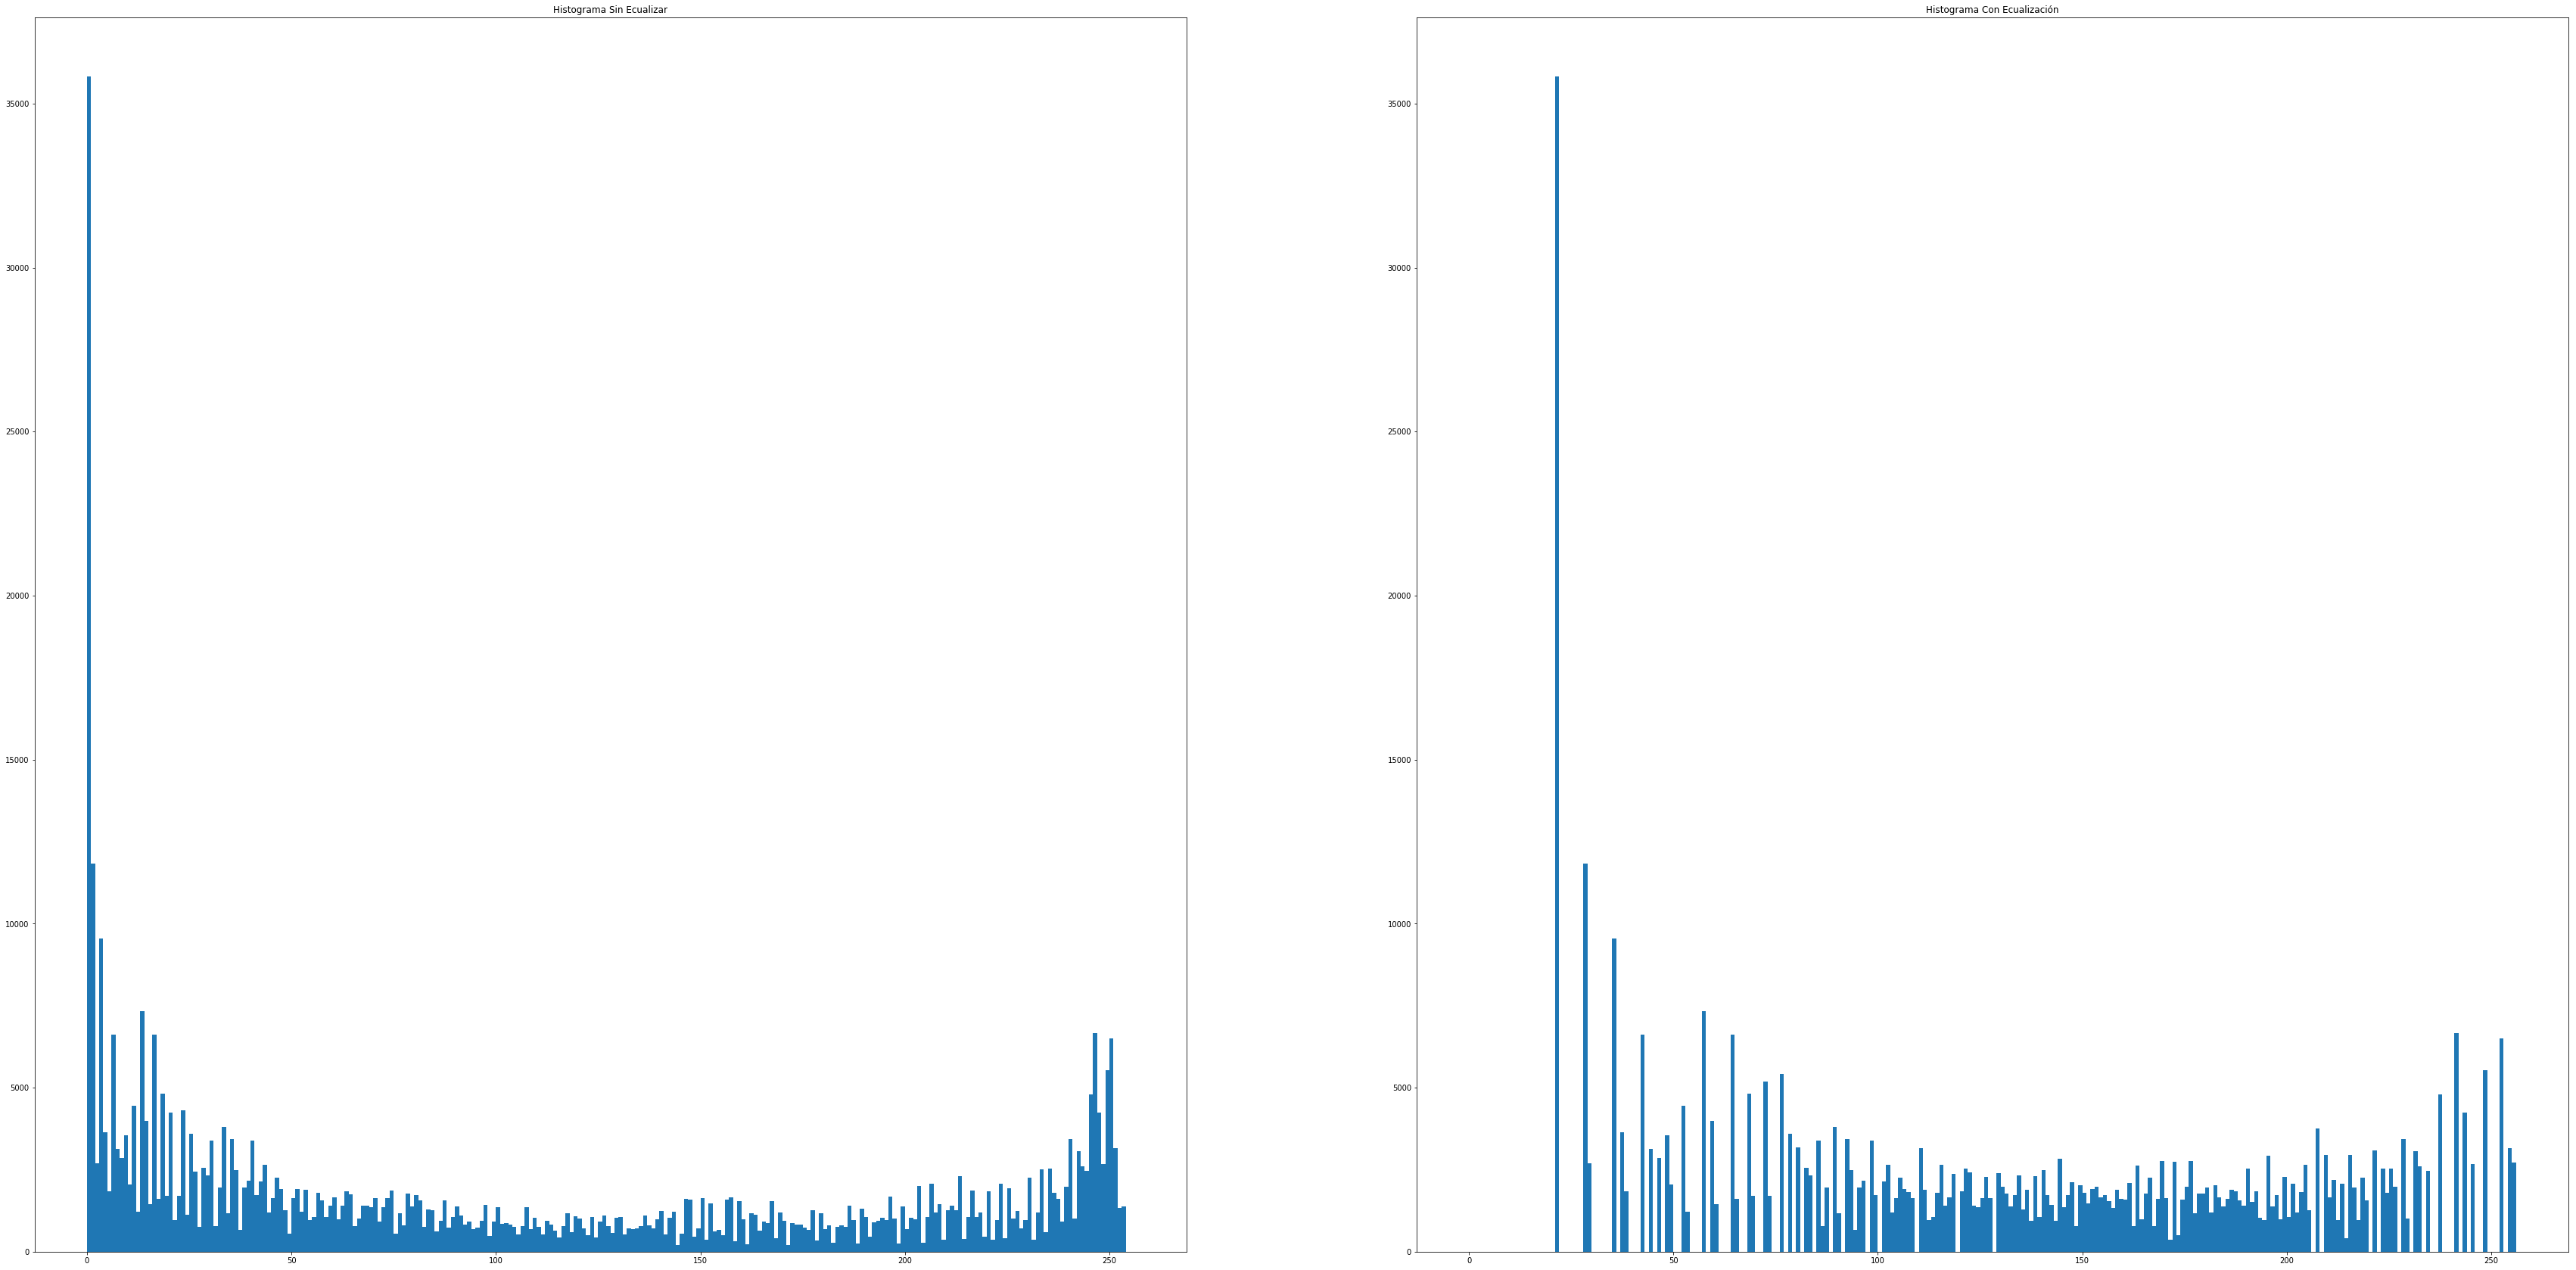

SystemExit: 

C:\Users\Johnatan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
main("img1.jpg")

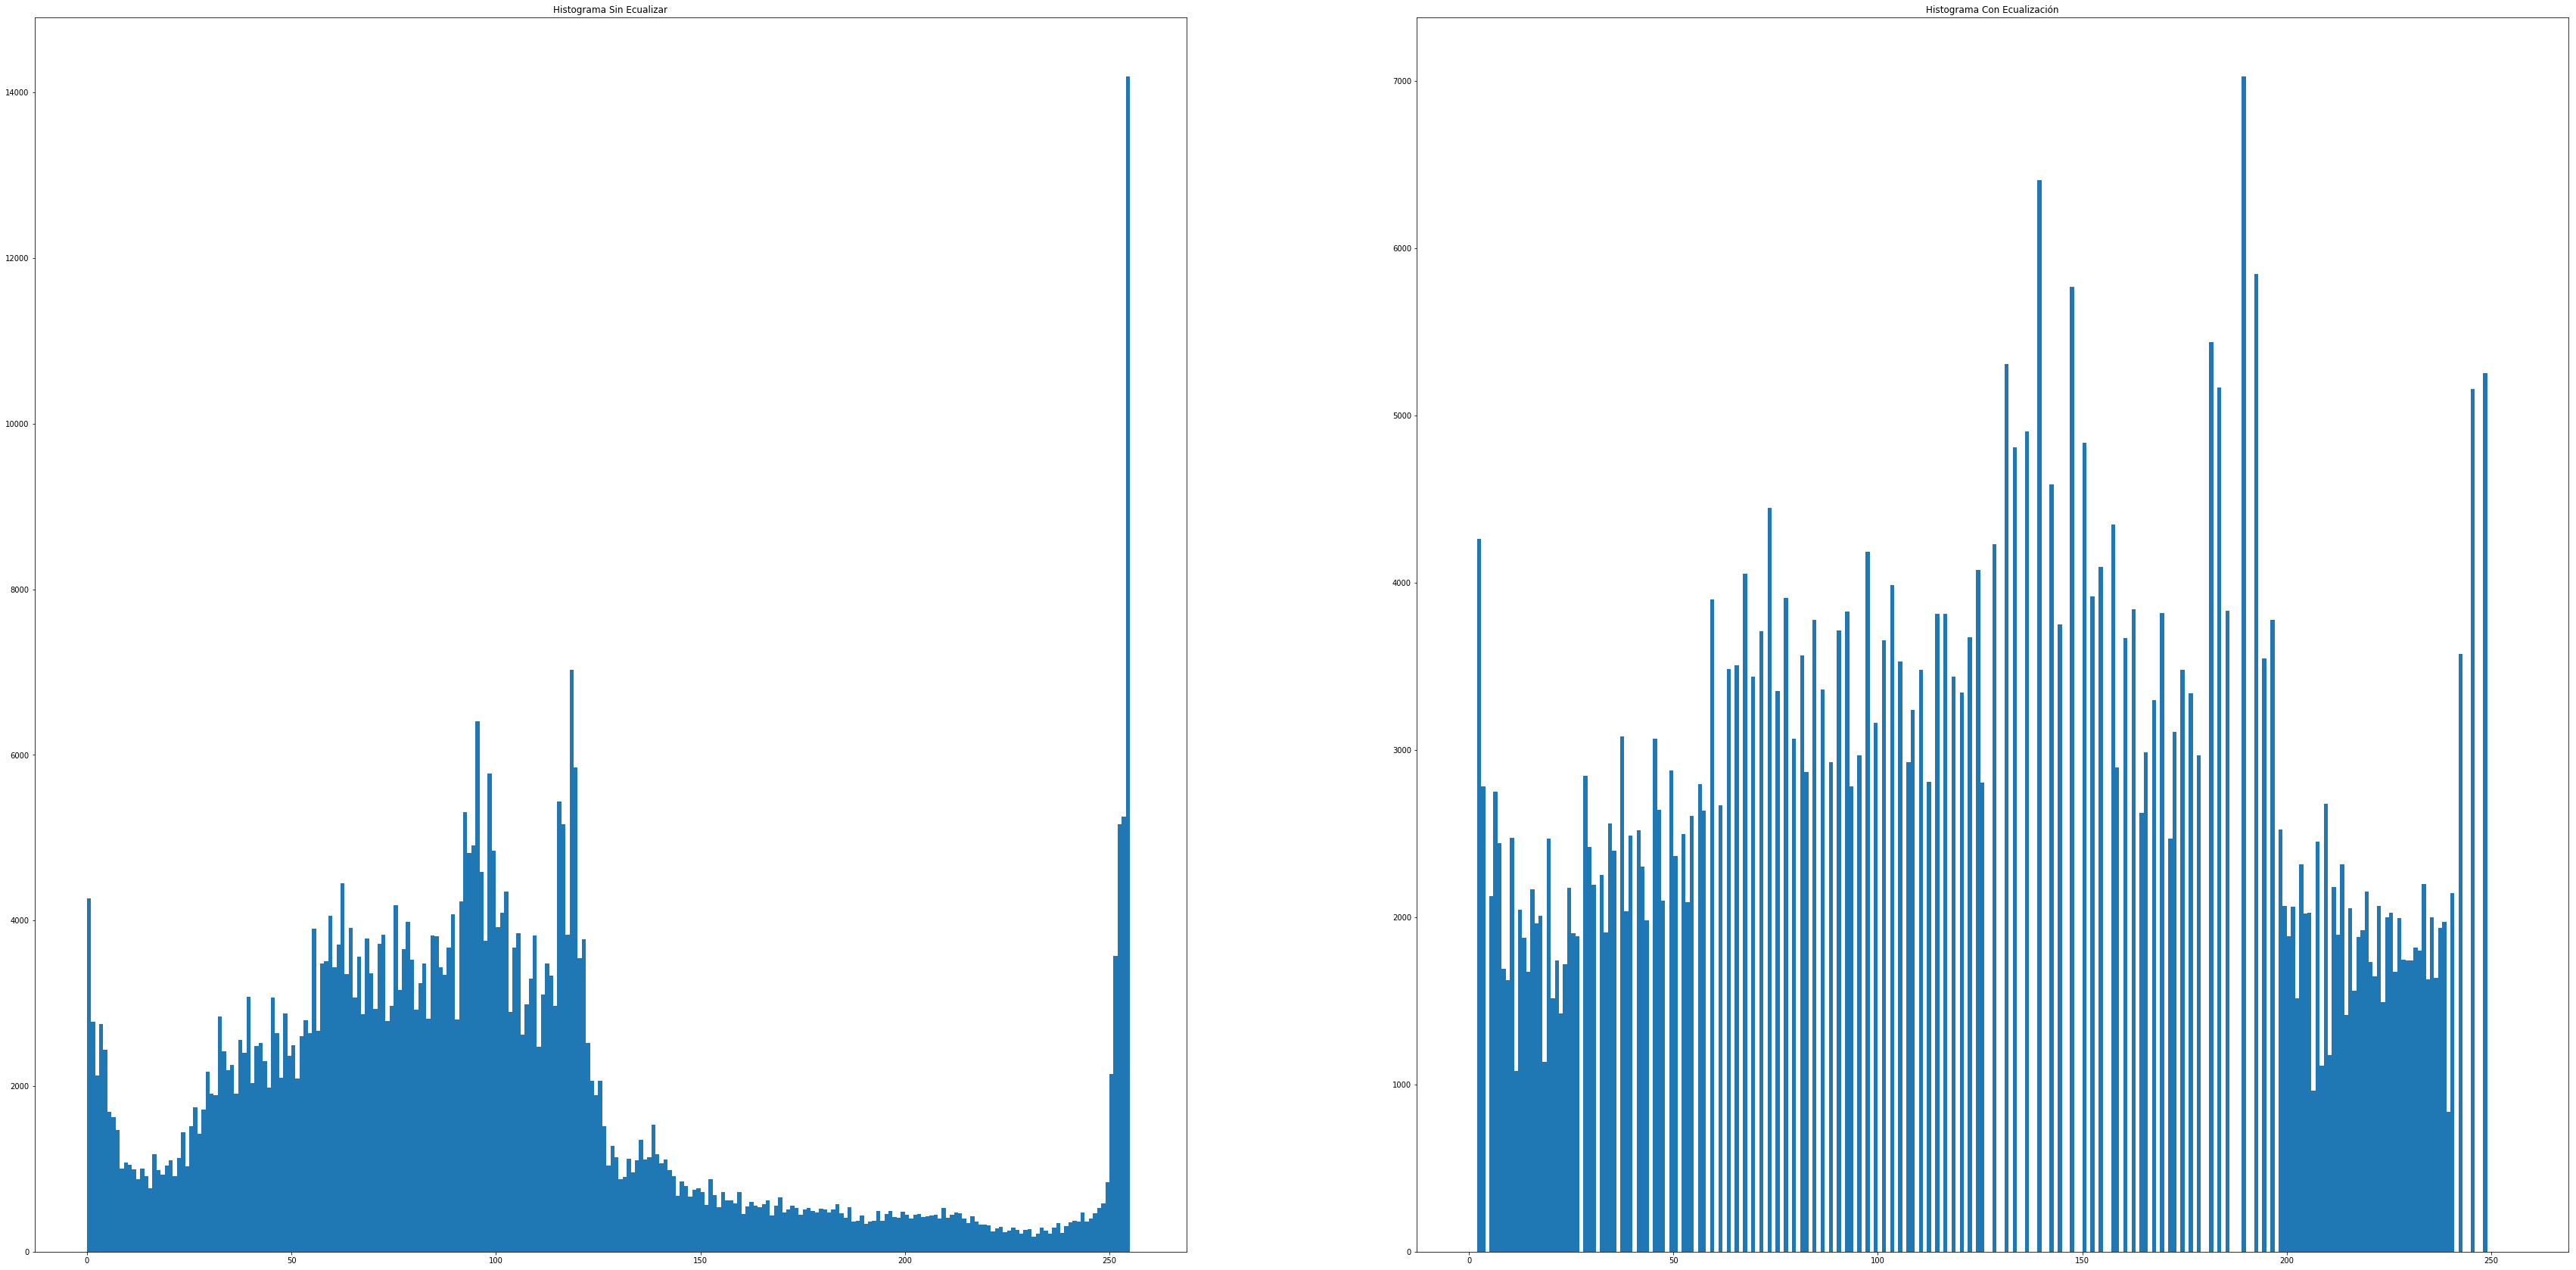

SystemExit: 

C:\Users\Johnatan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
main("Lena-jpg-playboy_.jpg")

# Area de pruebas